In [1]:
###Title: Spotify Project
###Author: Jonah Bostrom
###Started: 5/18/2022
###Finished: ???
###Description- Using spotify dataset to do some basic python and data science practice


###Resources:  (My code)- CS220 P12 (pandas), CS320 P2 (graphing)
###Also: https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019?resource=download

In [8]:

#######################################################
#PART 0- Initializing#############################
#######################################################


'##################'

In [9]:

import pandas as pd
import matplotlib as plt
import io 

#DF to reference
spot_df= pd.read_csv("spot_ds.csv")
spot_df.head()
# len(spot_df)


title      artist    top genre  \
0                  STARSTRUKK (feat. Katy Perry)       3OH!3    dance pop   
1                    My First Kiss (feat. Ke$ha)       3OH!3    dance pop   
2                                I Need A Dollar  Aloe Blacc     pop soul   
3  Airplanes (feat. Hayley Williams of Paramore)       B.o.B  atl hip hop   
4              Nothin' on You (feat. Bruno Mars)       B.o.B  atl hip hop   

   year released       added  bpm  nrgy  dnce  dB  live  val  dur  acous  \
0           2009  2022?02?17  140    81    61  -6    23   23  203      0   
1           2010  2022?02?17  138    89    68  -4    36   83  192      1   
2           2010  2022?02?17   95    48    84  -7     9   96  243     20   
3           2010  2022?02?17   93    87    66  -4     4   38  180     11   
4           2010  2022?02?17  104    85    69  -6     9   74  268     39   

   spch  pop  top year artist type  
0     6   70      2010         Duo  
1     8   68      2010         Duo  
2     3   72      2010        Solo  
3    12   80      2010        Solo  
4     5   79      2010        Solo

In [ ]:

#######################################################
#PART 1- Descriptive Stats#############################
#######################################################


In [3]:
###Descriptive Stats:##################################


###1.) Artist Types

#find all the types of "artist types"
art_type_list =list(spot_df.loc[:, "artist type"])

#better equipped for group by function
art_dict= {}
for val in art_type_list:
    if not val in art_dict:
        art_dict[val]= 1
    else:
        art_dict[val]+=1


###SUM --- testing
#Comprehension
# tot_val= {sum(x) for x in art_dict }
tot_count= 0
for val in art_dict:
    tot_count= art_dict[val]+ tot_count

# tot_count
# ##convert to tester code
# if (tot_count) != 1000:
#     print("ERROR", tot_count )
    
    
###Sort the dictionary

art_dict


# ax= art_dict.plot()


{'Duo': 70, 'Solo': 748, 'Band/Group': 169, 'Trio': 13}

In [4]:
###Descriptive Stats:##################################


###2.) Popular Year [ON HOLD]

#Compare 
yr_release_list =list(spot_df.loc[:, "year released"])
top_yr_list =list(spot_df.loc[:, "top year"])
# print(len(yr_release_list), len(top_yr_list))


#get the third row
spot_df[spot_df["artist"]=="B.o.B"]

# spot_df.iloc[spot_df["artist"]== 1]
spot_df["artist"]== 1



#per entry,  create an object that has yr released and top year 
# yr_release_dict= {}

# for val in art_type_list:
#     if not val in art_dict:
#         art_dict[val]= 1
#     else:
#         art_dict[val]+=1

        
# ###SUM --- testing
# #Comprehension
# # tot_val= {sum(x) for x in art_dict }
# tot_count= 0
# for val in art_dict:
#     tot_count= art_dict[val]+ tot_count

# # tot_count
# # ##convert to tester code
# # if (tot_count) != 1000:
# #     print("ERROR", tot_count )
    
    
# ###Sort the dictionary

# art_dict


# ax= art_dict.plot()





0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: artist, Length: 1000, dtype: bool

<AxesSubplot:xlabel='length'>

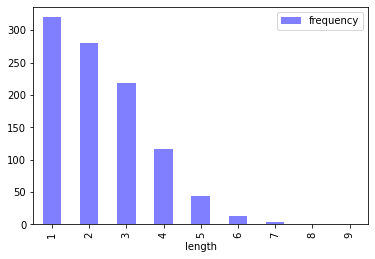

In [100]:
###Descriptive Stats:##################################


###3.) title of songs- length of words of song, length of letters per 
#Abstract words as titles? Like STARSTRUCKK

tit_list= list(spot_df.loc[:, "title"])

###Remove Features
# for substring "(feat" in list this string and everything to the end of the string with ""

tit_list = [x.split("(")[0] for x in tit_list]



#Encoding- Words that are showing up as question marks bc of encoding problems are still being counted in the length of the song title and thus are not a concern for the song name
#len(tit_list[val + 1].split())




###Remove Remix
# Remove Remix terms
# contains " - "

tit_list = [x.split(" - ")[0] for x in tit_list]

#testing code to check for remixes removed
# for element in tit_list:
#     if element.find("remix") != -1:
#         print(element)
#         break
        

# len(tit_list)
###create dictionary of lengths of songs
title_length_dictionary= {}
for val in tit_list:
    len_val= len(val.split())
    if not len_val in title_length_dictionary: #even if there is a repeating value we're still entering this code
#         print(len_val)
        title_length_dictionary[len_val]= 1
    else:
        title_length_dictionary[len_val]+=1        
###Testing- No loss of values
# che=list(title_length_dictionary.values())
# title_length_dictionary= 
# sum(che)

title_length_dictionary

df = pd.DataFrame(list(title_length_dictionary.items()),columns = ['length','frequency']) 
sort_df = df.sort_values(by="length", ascending=True)

# sort_df
ax= sort_df.plot.bar(x='length', y='frequency', color= "blue", alpha= .5) 
ax



In [118]:


tit_list= list(spot_df.loc[:, "title"])

tit_list= [x.split("(")[0] for x in tit_list]
tit_list= [x.split(" - ")[0] for x in tit_list]

spot_df["length"]= [len(x.split()) for x in tit_list]


# for val in length_list:
#     len_val= len(val)
#     if not len_val in title_length_dictionary: #even if there is a repeating value we're still entering this code
# #         print(len_val)
#         title_length_dictionary[len_val]= 1
#     else:
#         title_length_dictionary[len_val]+=1 

# spot_df

str_val= list(spot_df[(spot_df["length"]==9)]["title"])
(str_val)[0]

'My Songs Know What You Did In The Dark (Light Em Up)'

In [32]:
###Part 2- Modelling


#Investigate- Pop, dur variables

#Data cleaning- added; Could do per year values

'Where Are � Now '